In [1]:
# import libraries
import time
import random as r
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
# settings
sns.reset_orig
sns.set_style('darkgrid')
sns.set_palette('Set1')

np.set_printoptions(linewidth=200)

In [3]:
# initialize the random state using a seed
epoch = int(time.time())
r.seed(epoch)

print(f'Seeded at {epoch}.')

Seeded at 1654699565.


In [4]:
# create random coordinate function (-25 < X < 25)
rcoord = lambda: r.random() * 25 * (-1 if r.randrange(2) else 1)

In [5]:
# create set of suppliers
i_data = pd.DataFrame()
len_ = 4

i_data['X'] = [rcoord() for _ in range(len_)]
i_data['Y'] = [rcoord() for _ in range(len_)]
i_data['Supply'] = [r.randrange(334, 500) for _ in range(len_)]

i_data.head(10)

,X,Y,Supply
0,5.557649,-21.269614,465
1,19.777286,9.972638,420
2,-21.770193,13.710546,369
3,-24.424235,-20.562760,470


In [6]:
# create set of demand points
j_data = pd.DataFrame()
len_ = 6

j_data['X'] = [rcoord() for _ in range(len_)]
j_data['Y'] = [rcoord() for _ in range(len_)]
j_data['Demand'] = [r.randrange(50, 100) for _ in range(len_)]

j_data.head(10)

,X,Y,Demand
0,-9.280951,21.171497,81
1,-20.767482,-4.197839,80
2,11.256928,-11.113295,53
3,18.000212,-3.650352,76
4,5.265085,22.545420,86
5,-17.739823,-20.297696,99


Text(0.5, 1.0, 'Supply and Demand Locations')

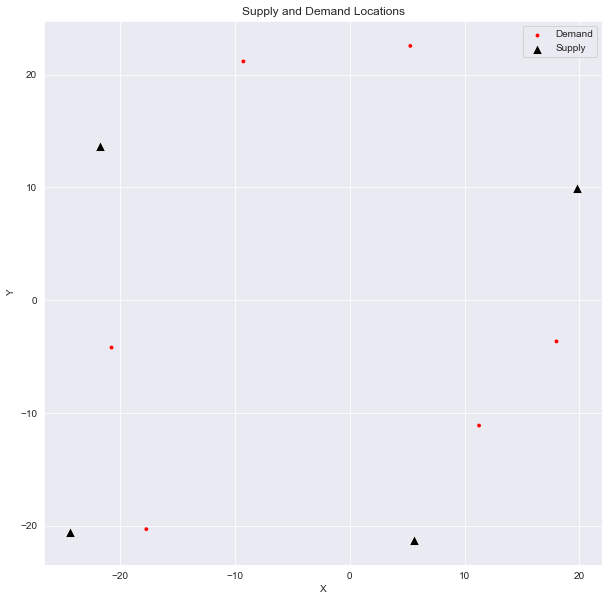

In [7]:
# plot the customers and facilities
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='X', y='Y', data=j_data, size=1, color='red', legend=False, label="Demand")
sns.scatterplot(x='X', y='Y', data=i_data, s=100, color='black', marker='^', label="Supply")
plt.legend()
plt.title('Supply and Demand Locations')

In [8]:
# create distance matrix
eucl = lambda x1, y1, x2, y2: ((x1 - x2)**2 + (y1 - y2)**2)**0.5

i_loc = i_data[['X', 'Y']].values
j_loc = j_data[['X', 'Y']].values

dist_ij = np.array([[eucl(i[0],i[1],j[0],j[1]) for j in j_loc] for i in i_loc])
dist_ij

array([[44.96033749, 31.3760742 , 11.64614121, 21.56978809, 43.81601062, 23.31773673],
       [31.141541  , 42.94974584, 22.74231897, 13.73840839, 19.20101104, 48.20608518],
       [14.54809081, 17.93643464, 41.31602336, 43.39453739, 28.44224353, 34.24623198],
       [44.39670284, 16.76849624, 36.91121508, 45.67125165, 52.34282037,  6.68966499]])

In [9]:
# save new data to files
with pd.ExcelWriter('data.xlsx', mode='w') as writer:
    i_data.to_excel(writer, sheet_name='i_data', index=False)
    j_data.to_excel(writer, sheet_name='j_data', index=False)
    pd.DataFrame(dist_ij).to_excel(writer, sheet_name='dist_ij', index=False)
    
print('Done')

Done
